https://www.kaggle.com/datasets/vagifa/ethereum-frauddetection-dataset

https://www.kaggle.com/code/soheiltehranipour/how-to-detect-fraud-in-crypto

About Dataset
Context

This dataset contains rows of known fraud and valid transactions made over Ethereum, a type of cryptocurrency. This dataset is imbalanced, so keep that in mind when modelling
Content

Here is a description of the rows of the dataset:

    Index: the index number of a row

    Address: the address of the ethereum account

    FLAG: whether the transaction is fraud or not

    Avg min between sent tnx: Average time between sent transactions for account in minutes

    Avg_min_between_received_tnx: Average time between received transactions for account in minutes

    Time_Diff_between_first_and_last(Mins): Time difference between the first and last transaction

    Sent_tnx: Total number of sent normal transactions

    Received_tnx: Total number of received normal transactions

    Number_of_Created_Contracts: Total Number of created contract transactions

    Unique_Received_From_Addresses: Total Unique addresses from which account received transactions

    Unique_Sent_To_Addresses20: Total Unique addresses from which account sent transactions

    Min_Value_Received: Minimum value in Ether ever received

    Max_Value_Received: Maximum value in Ether ever received

    Avg_Value_Received5Average value in Ether ever received

    Min_Val_Sent: Minimum value of Ether ever sent

    Max_Val_Sent: Maximum value of Ether ever sent

    Avg_Val_Sent: Average value of Ether ever sent

    Min_Value_Sent_To_Contract: Minimum value of Ether sent to a contract

    Max_Value_Sent_To_Contract: Maximum value of Ether sent to a contract

    Avg_Value_Sent_To_Contract: Average value of Ether sent to contracts

    Total_Transactions(Including_Tnx_to_Create_Contract): Total number of transactions

    Total_Ether_Sent:Total Ether sent for account address

    Total_Ether_Received: Total Ether received for account address

    Total_Ether_Sent_Contracts: Total Ether sent to Contract addresses

    Total_Ether_Balance: Total Ether Balance following enacted transactions

    Total_ERC20_Tnxs: Total number of ERC20 token transfer transactions

    ERC20_Total_Ether_Received: Total ERC20 token received transactions in Ether

    ERC20_Total_Ether_Sent: Total ERC20token sent transactions in Ether

    ERC20_Total_Ether_Sent_Contract: Total ERC20 token transfer to other contracts in Ether

    ERC20_Uniq_Sent_Addr: Number of ERC20 token transactions sent to Unique account addresses

    ERC20_Uniq_Rec_Addr: Number of ERC20 token transactions received from Unique addresses

    ERC20_Uniq_Rec_Contract_Addr: Number of ERC20token transactions received from Unique contract addresses

    ERC20_Avg_Time_Between_Sent_Tnx: Average time between ERC20 token sent transactions in minutes

    ERC20_Avg_Time_Between_Rec_Tnx: Average time between ERC20 token received transactions in minutes

    ERC20_Avg_Time_Between_Contract_Tnx: Average time ERC20 token between sent token transactions

    ERC20_Min_Val_Rec: Minimum value in Ether received from ERC20 token transactions for account

    ERC20_Max_Val_Rec: Maximum value in Ether received from ERC20 token transactions for account

    ERC20_Avg_Val_Rec: Average value in Ether received from ERC20 token transactions for account

    ERC20_Min_Val_Sent: Minimum value in Ether sent from ERC20 token transactions for account

    ERC20_Max_Val_Sent: Maximum value in Ether sent from ERC20 token transactions for account

    ERC20_Avg_Val_Sent: Average value in Ether sent from ERC20 token transactions for account

    ERC20_Uniq_Sent_Token_Name: Number of Unique ERC20 tokens transferred

    ERC20_Uniq_Rec_Token_Name: Number of Unique ERC20 tokens received

    ERC20_Most_Sent_Token_Type: Most sent token for account via ERC20 transaction

    ERC20_Most_Rec_Token_Type: Most received token for account via ERC20 transactions


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, classification_report

import pickle

In [5]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [6]:
df = pd.read_csv('/drive/My Drive/apu-dl-datasets/transaction_dataset.csv', index_col=0)
df.sample(3) 

,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
6251,3319,0xa72778ca3eaaac10560c8e2eb6aca50bbee51f63,0,24.45,0.23,73.82,3,2,0,2,...,0.000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0,0
3136,204,0x5286da5995727a27240cc9674d2e04f385720048,0,27614.23,2.98,276148.28,10,2,0,2,...,3.471,31.3,14.063337,0.0,0.0,0.0,3.0,11.0,REP,Livepeer Token
4956,2024,0x830417840d2c22e51a212c9479970f4cddc03b74,0,164.38,0.21,329.18,2,2,0,2,...,0.000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0,0


In [7]:
df.shape

(9841, 50)

In [8]:


# drop first two columns (Index, Adress)
df = df.iloc[:,2:]



In [10]:
pip install --pre pycaret -q


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 59.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.2/77.2 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 14.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 66.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 58.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.5/140.5 kB 12.4 MB/s eta 0:0

In [12]:
from pycaret.classification import *

In [13]:
setup(df,target="FLAG",session_id=85)

,Description,Value
0,Session id,85
1,Target,FLAG
2,Target type,Binary
3,Original data shape,"(9841, 48)"
4,Transformed data shape,"(9841, 48)"
5,Transformed train set shape,"(6888, 48)"
6,Transformed test set shape,"(2953, 48)"
7,Numeric features,45
8,Categorical features,2
9,Rows with missing values,8.7%


In [14]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9949,0.9996,0.9836,0.9934,0.9885,0.9852,0.9853,1.0630
xgboost,Extreme Gradient Boosting,0.9943,0.9996,0.9823,0.9921,0.9872,0.9835,0.9836,1.9520
ada,Ada Boost Classifier,0.9936,0.9991,0.9817,0.9894,0.9855,0.9814,0.9814,1.1640
rf,Random Forest Classifier,0.9933,0.9991,0.9705,0.9993,0.9847,0.9804,0.9806,1.9210
et,Extra Trees Classifier,0.9933,0.9995,0.9718,0.9980,0.9847,0.9804,0.9806,1.4000
gbc,Gradient Boosting Classifier,0.9929,0.9996,0.9784,0.9895,0.9838,0.9793,0.9793,3.8470
dt,Decision Tree Classifier,0.9874,0.9830,0.9751,0.9684,0.9716,0.9635,0.9636,0.6700
knn,K Neighbors Classifier,0.9148,0.9335,0.7692,0.8335,0.7998,0.7458,0.7470,0.3640
ridge,Ridge Classifier,0.8994,0.0000,0.5542,0.9849,0.7086,0.6536,0.6934,0.2290
lda,Linear Discriminant Analysis,0.8994,0.9599,0.5555,0.9828,0.7091,0.6540,0.6933,0.5220


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=85, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9841 entries, 0 to 9840
Data columns (total 48 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   FLAG                                                  9841 non-null   int64  
 1   Avg min between sent tnx                              9841 non-null   float64
 2   Avg min between received tnx                          9841 non-null   float64
 3   Time Diff between first and last (Mins)               9841 non-null   float64
 4   Sent tnx                                              9841 non-null   int64  
 5   Received Tnx                                          9841 non-null   int64  
 6   Number of Created Contracts                           9841 non-null   int64  
 7   Unique Received From Addresses                        9841 non-null   int64  
 8   Unique Sent To Addresses                              9841

In [16]:
for col in df:print(f'{col} : {len(df[col].unique())}')

FLAG : 2
Avg min between sent tnx : 5013
Avg min between received tnx : 6223
Time Diff between first and last (Mins) : 7810
Sent tnx : 641
Received Tnx : 727
Number of Created Contracts : 20
Unique Received From Addresses : 256
Unique Sent To Addresses : 258
min value received : 4589
max value received  : 6302
avg val received : 6767
min val sent : 4719
max val sent : 6647
avg val sent : 5854
min value sent to contract : 3
max val sent to contract : 4
avg value sent to contract : 4
total transactions (including tnx to create contract : 897
total Ether sent : 5868
total ether received : 6728
total ether sent contracts : 4
total ether balance : 5717
 Total ERC20 tnxs : 301
 ERC20 total Ether received : 3461
 ERC20 total ether sent : 1416
 ERC20 total Ether sent contract : 30
 ERC20 uniq sent addr : 108
 ERC20 uniq rec addr : 148
 ERC20 uniq sent addr.1 : 5
 ERC20 uniq rec contract addr : 124
 ERC20 avg time between sent tnx : 2
 ERC20 avg time between rec tnx : 2
 ERC20 avg time between 

In [17]:
df.select_dtypes(include=['float','int']).describe()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,25.840159,43.845153,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,263.820410,325.929139,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,1.000000,0.001000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,2.000000,0.095856,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,3.000000,2.000000,...,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,9287.000000,10000.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


In [18]:
df['FLAG'].value_counts()

0    7662
1    2179
Name: FLAG, dtype: int64

In [19]:
fig = px.pie(df, values=df['FLAG'].value_counts().values, names=df['FLAG'].value_counts() ,
             title='Target distribution of being Fraud or not', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [20]:
print(f'Percentage of non-fraudulent instances : {len(df.loc[df["FLAG"]==0])/len(df["FLAG"])*100}')
print(f'Percentage of fraudulent instances : {len(df.loc[df["FLAG"]==1])/len(df["FLAG"])*100}')

Percentage of non-fraudulent instances : 77.85794126613149
Percentage of fraudulent instances : 22.14205873386851


In [21]:
df.isnull().sum()

FLAG                                                      0
Avg min between sent tnx                                  0
Avg min between received tnx                              0
Time Diff between first and last (Mins)                   0
Sent tnx                                                  0
Received Tnx                                              0
Number of Created Contracts                               0
Unique Received From Addresses                            0
Unique Sent To Addresses                                  0
min value received                                        0
max value received                                        0
avg val received                                          0
min val sent                                              0
max val sent                                              0
avg val sent                                              0
min value sent to contract                                0
max val sent to contract                

In [22]:
# Turn object variables into 'category' dtype for more computation efficiency
categories = df.select_dtypes('O').columns.astype('category')
df[categories]

,ERC20 most sent token type,ERC20_most_rec_token_type
0,Cofoundit,Numeraire
1,Livepeer Token,Livepeer Token
2,None,XENON
3,Raiden,XENON
4,StatusNetwork,EOS
...,...,...
9836,,GSENetwork
9837,,Blockwell say NOTSAFU
9838,,Free BOB Tokens - BobsRepair.com
9839,NaN,NaN


In [23]:
# Drop the two categorical features
df.drop(df[categories], axis=1, inplace=True)

In [24]:
# Replace missings of numerical variables with median
df.fillna(df.median(), inplace=True)

In [25]:
df.isnull().sum()

FLAG                                                    0
Avg min between sent tnx                                0
Avg min between received tnx                            0
Time Diff between first and last (Mins)                 0
Sent tnx                                                0
Received Tnx                                            0
Number of Created Contracts                             0
Unique Received From Addresses                          0
Unique Sent To Addresses                                0
min value received                                      0
max value received                                      0
avg val received                                        0
min val sent                                            0
max val sent                                            0
avg val sent                                            0
min value sent to contract                              0
max val sent to contract                                0
avg value sent

In [26]:
# Filtering the features with 0 variance
no_var = df.var() == 0
df.var()[no_var]

 ERC20 avg time between sent tnx        0.0
 ERC20 avg time between rec tnx         0.0
 ERC20 avg time between rec 2 tnx       0.0
 ERC20 avg time between contract tnx    0.0
 ERC20 min val sent contract            0.0
 ERC20 max val sent contract            0.0
 ERC20 avg val sent contract            0.0
dtype: float64

In [27]:
# Drop features with 0 variance --- these features will not help in the performance of the model
df.drop(df.var()[no_var].index, axis = 1, inplace = True)
print(df.var())

FLAG                                                    1.724110e-01
Avg min between sent tnx                                4.616718e+08
Avg min between received tnx                            5.327656e+08
Time Diff between first and last (Mins)                 1.042889e+11
Sent tnx                                                5.733918e+05
Received Tnx                                            8.851734e+05
Number of Created Contracts                             2.000685e+04
Unique Received From Addresses                          8.917457e+04
Unique Sent To Addresses                                6.960121e+04
min value received                                      1.062298e+05
max value received                                      1.692294e+08
avg val received                                        8.323238e+06
min val sent                                            1.921264e+04
max val sent                                            4.394646e+07
avg val sent                      

In [28]:
df.shape

(9841, 39)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9841 entries, 0 to 9840
Data columns (total 39 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   FLAG                                                  9841 non-null   int64  
 1   Avg min between sent tnx                              9841 non-null   float64
 2   Avg min between received tnx                          9841 non-null   float64
 3   Time Diff between first and last (Mins)               9841 non-null   float64
 4   Sent tnx                                              9841 non-null   int64  
 5   Received Tnx                                          9841 non-null   int64  
 6   Number of Created Contracts                           9841 non-null   int64  
 7   Unique Received From Addresses                        9841 non-null   int64  
 8   Unique Sent To Addresses                              9841

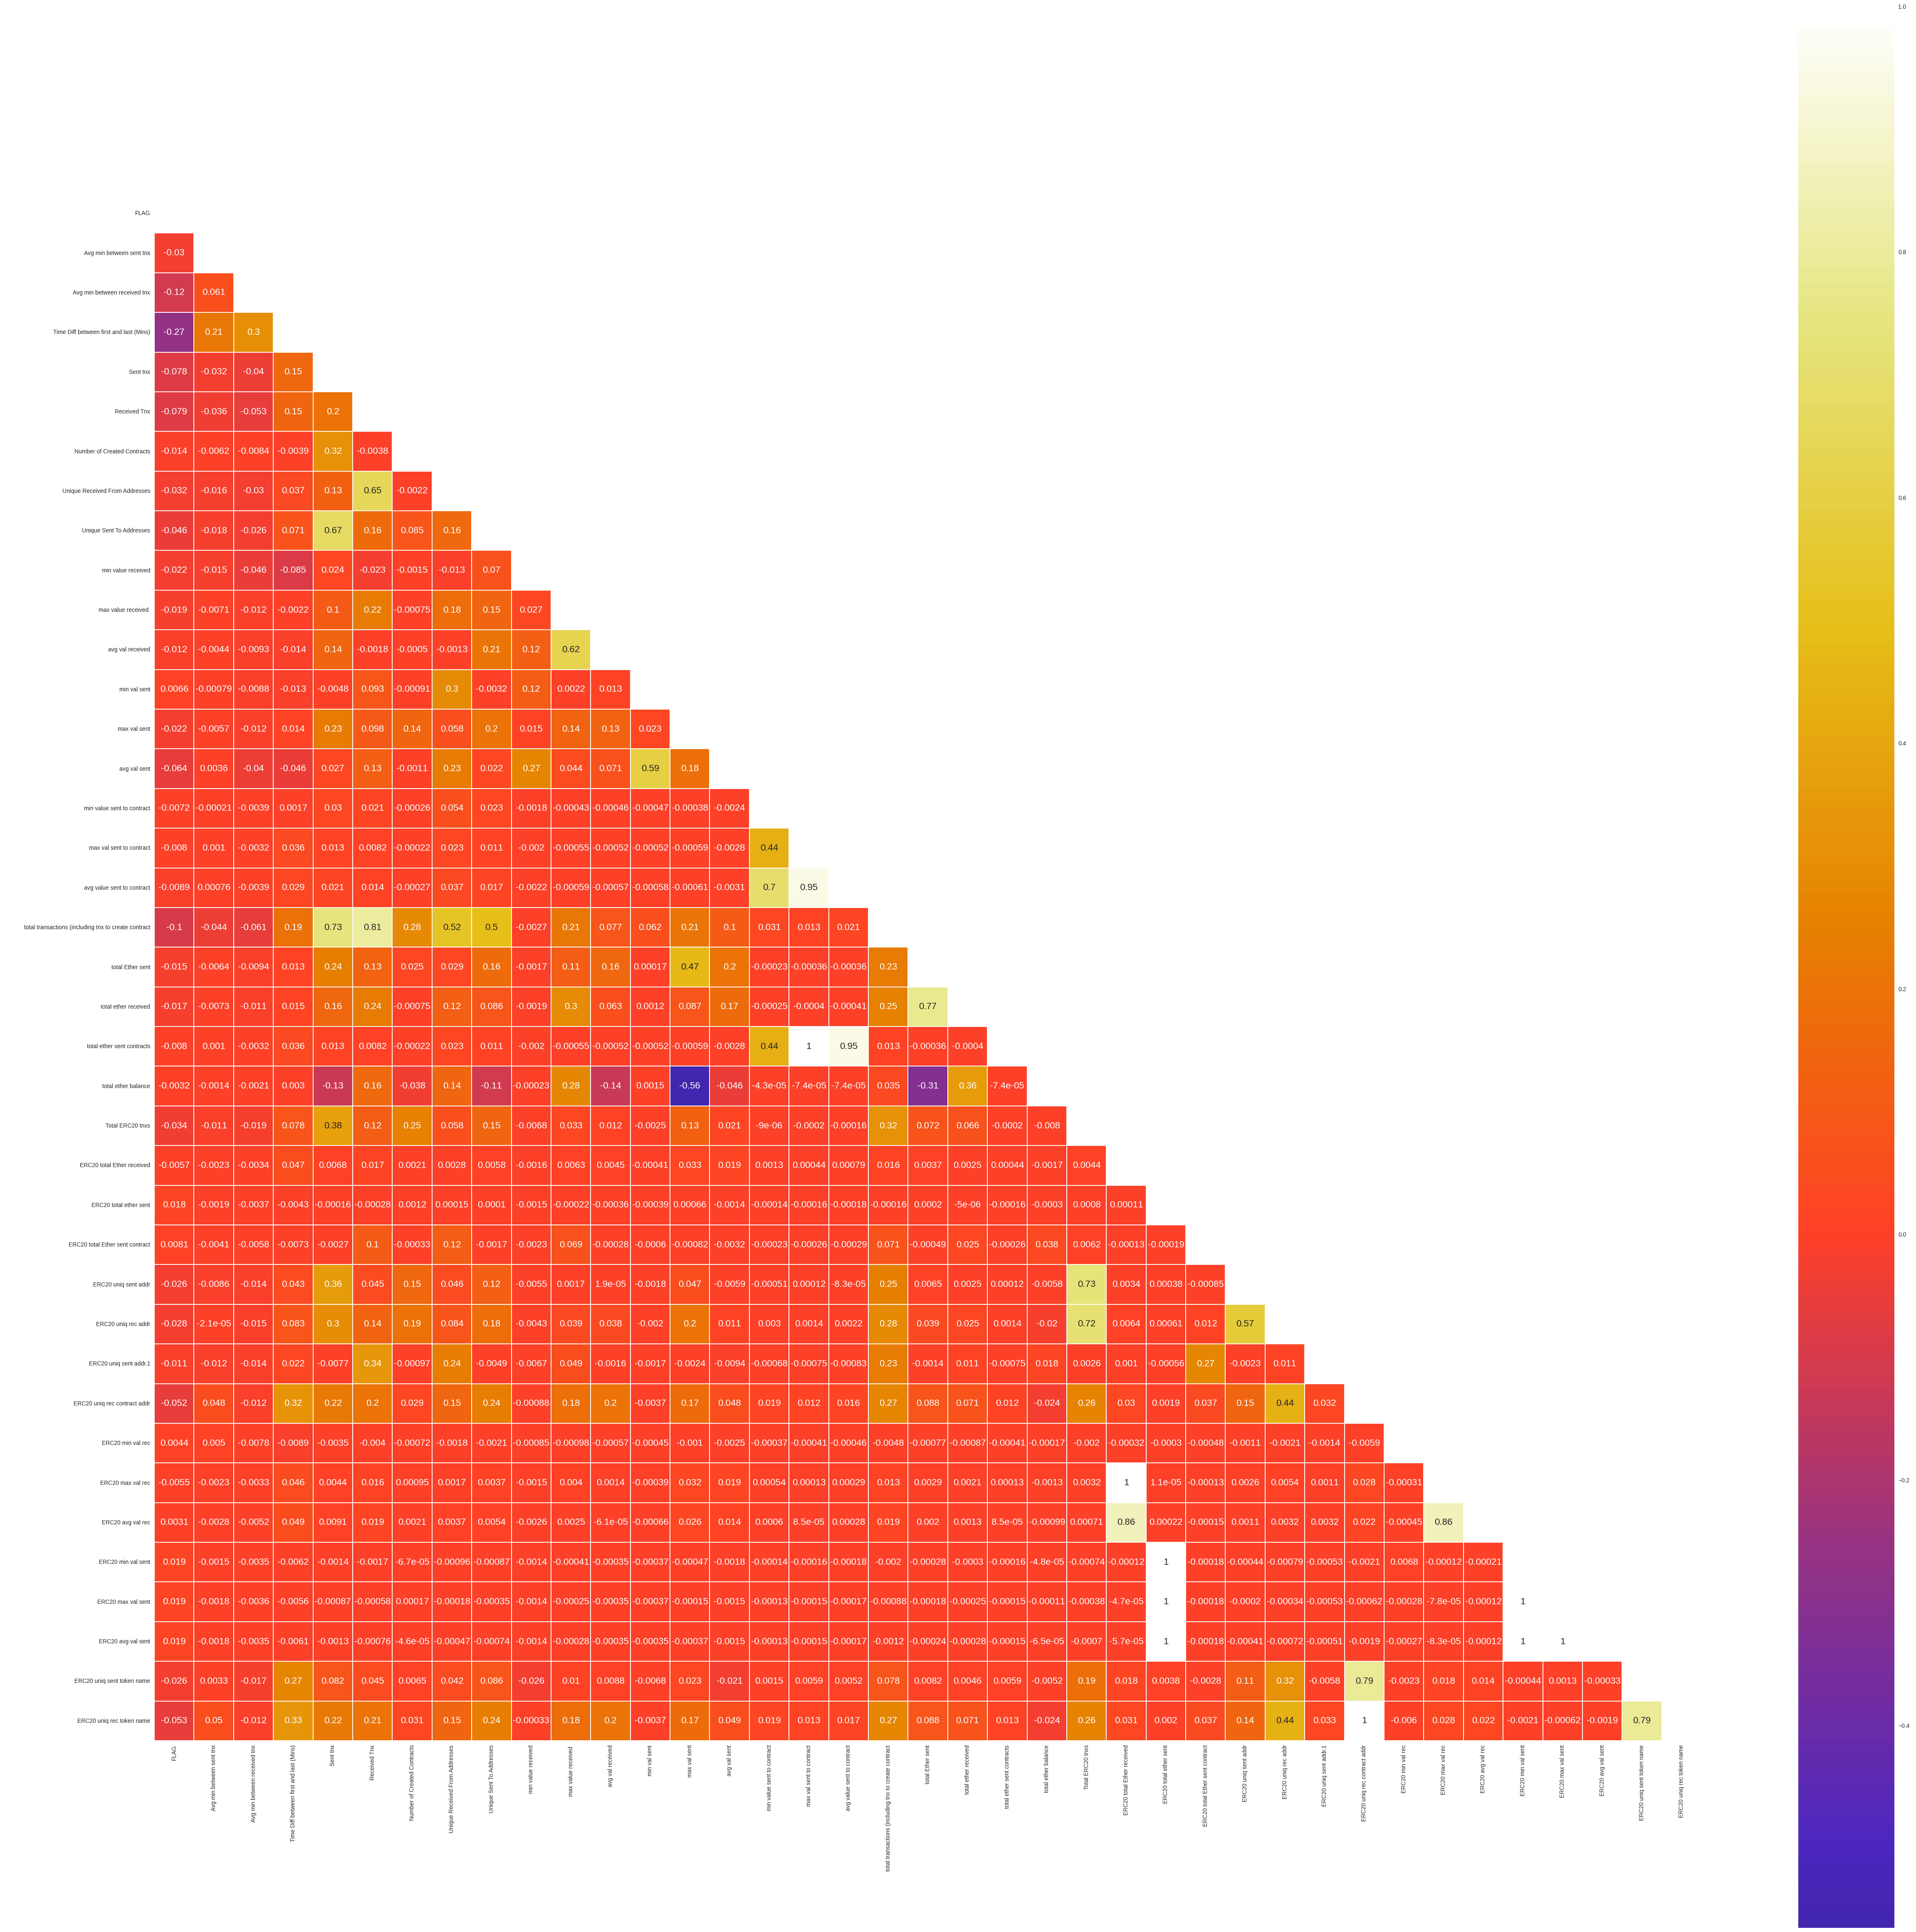

In [30]:
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(60,60))
    sns.heatmap(corr,  mask=mask, annot=True, cmap='CMRmap', center=0, linewidths=0.1, square=True,annot_kws={"size": 16})

In [31]:
soretd_corr=corr.sort_values(by=['FLAG'],key=abs)

In [32]:
soretd_corr

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name
ERC20 avg val rec,0.003132,-0.002829,-0.005241,0.049160,0.009104,0.019382,0.002096,0.003741,0.005412,-0.002610,...,0.003207,0.021501,-0.000455,0.859766,1.000000,-0.000205,-0.000117,-0.000123,0.013764,0.022273
total ether balance,-0.003229,-0.001425,-0.002149,0.002955,-0.127211,0.158146,-0.037902,0.144949,-0.113428,-0.000233,...,0.018368,-0.023787,-0.000170,-0.001251,-0.000991,-0.000048,-0.000112,-0.000065,-0.005164,-0.023809
ERC20 min val rec,0.004434,0.004998,-0.007794,-0.008921,-0.003480,-0.004043,-0.000724,-0.001784,-0.002093,-0.000847,...,-0.001367,-0.005930,1.000000,-0.000311,-0.000455,0.006815,-0.000280,-0.000265,-0.002288,-0.006013
ERC20 max val rec,-0.005510,-0.002260,-0.003326,0.046278,0.004445,0.015522,0.000946,0.001691,0.003696,-0.001528,...,0.001051,0.027598,-0.000311,1.000000,0.859766,-0.000121,-0.000078,-0.000083,0.017746,0.028497
ERC20 total Ether received,-0.005711,-0.002339,-0.003430,0.046570,0.006840,0.016648,0.002099,0.002832,0.005809,-0.001580,...,0.001031,0.030039,-0.000322,0.999967,0.859823,-0.000125,-0.000047,-0.000057,0.018349,0.030934
min val sent,0.006626,-0.000789,-0.008761,-0.013107,-0.004846,0.093448,-0.000913,0.296240,-0.003166,0.117682,...,-0.001735,-0.003749,-0.000446,-0.000393,-0.000663,-0.000369,-0.000366,-0.000353,-0.006785,-0.003728
min value sent to contract,-0.007213,-0.000210,-0.003916,0.001734,0.029529,0.020645,-0.000261,0.053946,0.023183,-0.001820,...,-0.000678,0.018886,-0.000372,0.000541,0.000598,-0.000144,-0.000134,-0.000134,0.001533,0.019304
max val sent to contract,-0.007988,0.001044,-0.003230,0.036162,0.013263,0.008243,-0.000225,0.023258,0.010926,-0.002015,...,-0.000750,0.012325,-0.000412,0.000133,0.000085,-0.000160,-0.000155,-0.000151,0.005911,0.012685
total ether sent contracts,-0.007988,0.001044,-0.003230,0.036162,0.013263,0.008243,-0.000225,0.023258,0.010926,-0.002015,...,-0.000750,0.012325,-0.000412,0.000133,0.000085,-0.000160,-0.000155,-0.000151,0.005911,0.012685
ERC20 total Ether sent contract,0.008127,-0.004101,-0.005813,-0.007337,-0.002652,0.104939,-0.000334,0.116755,-0.001697,-0.002331,...,0.274658,0.037021,-0.000477,-0.000125,-0.000154,-0.000184,-0.000183,-0.000177,-0.002817,0.036892


In [33]:
corr['min val sent']

FLAG                                                    0.006626
Avg min between sent tnx                               -0.000789
Avg min between received tnx                           -0.008761
Time Diff between first and last (Mins)                -0.013107
Sent tnx                                               -0.004846
Received Tnx                                            0.093448
Number of Created Contracts                            -0.000913
Unique Received From Addresses                          0.296240
Unique Sent To Addresses                               -0.003166
min value received                                      0.117682
max value received                                      0.002239
avg val received                                        0.012988
min val sent                                            1.000000
max val sent                                            0.022662
avg val sent                                            0.594868
min value sent to contrac

In [34]:


drop = ['total transactions (including tnx to create contract',
        'total ether sent contracts',
        'max val sent to contract',
        ' ERC20 avg val rec',
        ' ERC20 avg val rec',
        ' ERC20 max val rec',
        ' ERC20 min val rec',
        ' ERC20 uniq rec contract addr',
        'max val sent',
        ' ERC20 avg val sent',
        ' ERC20 min val sent',
        ' ERC20 max val sent',
        ' Total ERC20 tnxs',
        'avg value sent to contract',
        'Unique Sent To Addresses',
        'Unique Received From Addresses',
        'total ether received',
        ' ERC20 uniq sent token name',
        'min value received',
        'min val sent',
        ' ERC20 uniq rec addr' ]
df.drop(drop, axis=1, inplace=True)



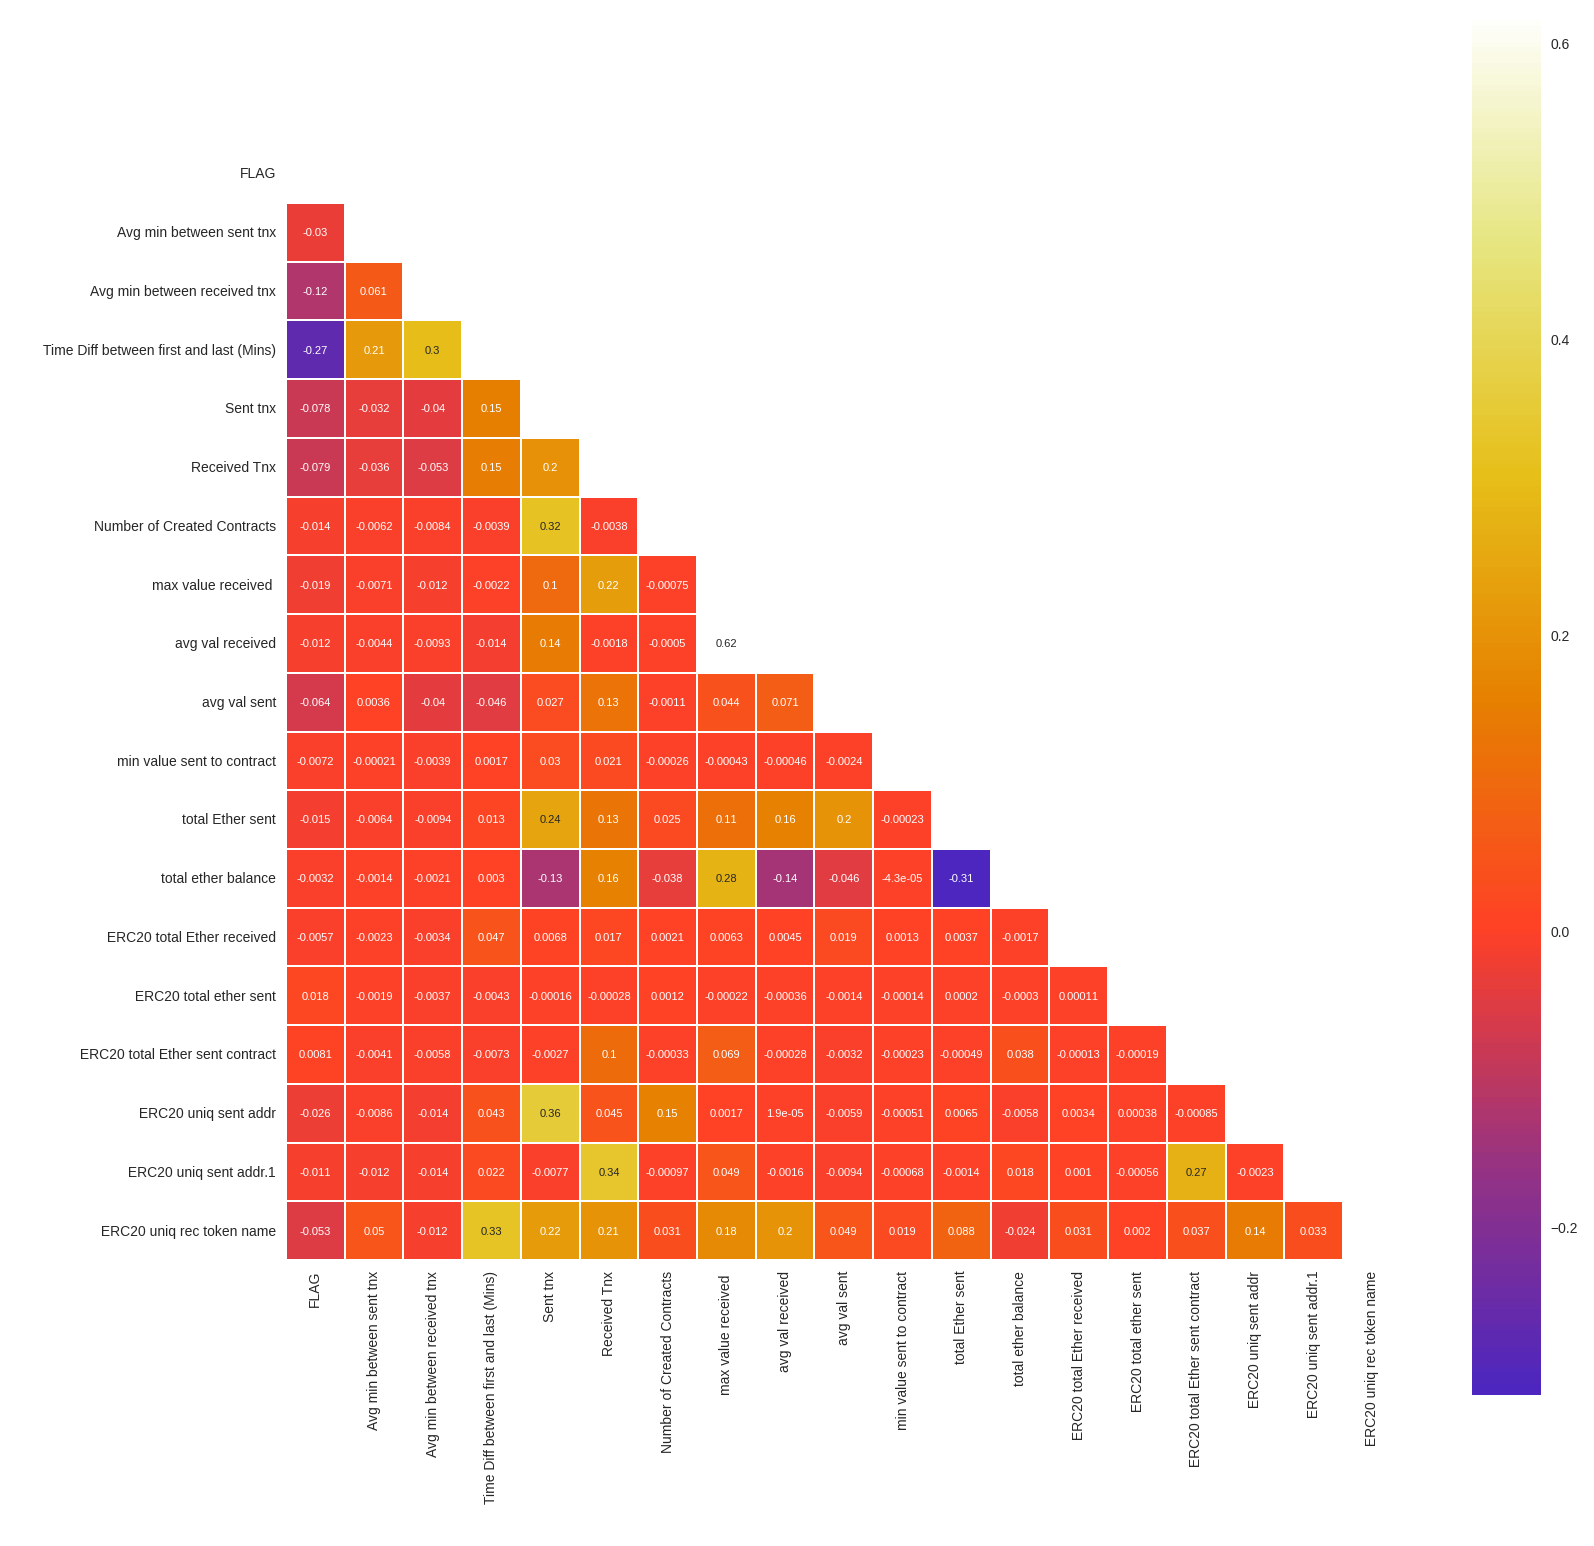

In [35]:
# Recheck the Correlation matrix
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,18))
    sns.heatmap(corr,  mask=mask, annot=True, cmap='CMRmap', center=0, linewidths=0.1, square=True,annot_kws={"size": 8})

In [36]:
columns = df.columns
columns


Index(['FLAG', 'Avg min between sent tnx', 'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'max value received ',
       'avg val received', 'avg val sent', 'min value sent to contract',
       'total Ether sent', 'total ether balance',
       ' ERC20 total Ether received', ' ERC20 total ether sent',
       ' ERC20 total Ether sent contract', ' ERC20 uniq sent addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec token name'],
      dtype='object')

In [37]:
# Some features present a small distribution
for i in df.columns[1:]:
    if len(df[i].value_counts()) < 10:
        print(f'The column {i} has the following distribution: \n{df[i].value_counts()}')
        print('======================================')



The column min value sent to contract has the following distribution: 
0.00    9839
0.02       1
0.01       1
Name: min value sent to contract, dtype: int64
The column  ERC20 uniq sent addr.1 has the following distribution: 
0.0    9813
1.0      26
3.0       1
2.0       1
Name:  ERC20 uniq sent addr.1, dtype: int64


In [38]:
drops = ['min value sent to contract', ' ERC20 uniq sent addr.1']
df.drop(drops, axis=1, inplace=True)
print(df.shape)
df.head()

(9841, 17)


,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,max value received,avg val received,avg val sent,total Ether sent,total ether balance,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec token name
0,0,844.26,1093.71,704785.63,721,89,0,45.806785,6.589513,1.200681,865.691093,-279.224419,3.558854e+07,3.560317e+07,0.0,30.0,57.0
1,0,12709.07,2958.44,1218216.73,94,8,0,2.613269,0.385685,0.032844,3.087297,-0.001819,4.034283e+02,2.260809e+00,0.0,1.0,7.0
2,0,246194.54,2434.02,516729.30,2,10,0,1.165453,0.358906,1.794308,3.588616,0.000441,5.215121e+02,0.000000e+00,0.0,0.0,8.0
3,0,10219.60,15785.09,397555.90,25,9,0,500.000000,99.488840,70.001834,1750.045862,-854.646303,1.711105e+04,1.141223e+04,0.0,2.0,11.0
4,0,36.61,10707.77,382472.42,4598,20,1,12.802411,2.671095,0.022688,104.318883,-50.896986,1.628297e+05,1.235399e+05,0.0,4.0,27.0


In [39]:
y = df.iloc[:, 0]
X = df.iloc[:, 1:]
print(X.shape, y.shape)


(9841, 16) (9841,)


In [40]:
# Split into training (80%) and testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7872, 16) (7872,)
(1969, 16) (1969,)


In [41]:
X_train


,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,max value received,avg val received,avg val sent,total Ether sent,total ether balance,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec token name
4886,4224.31,15322.04,1141794.73,119,42,0,125.017611,21.091836,8.420149,1001.997727,-116.140623,3.952977e+05,335200.1525,0.0,15.0,35.0
9098,0.00,0.00,0.00,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e-12,0.0000,0.0,0.0,1.0
1109,15.88,394.63,563075.85,1363,1372,0,27.000000,0.278498,0.277128,377.725350,4.373288,0.000000e+00,0.0000,0.0,0.0,0.0
4766,0.00,19859.78,39719.55,0,2,1,0.998990,0.499495,0.000000,0.000000,0.998990,0.000000e+00,0.0000,0.0,0.0,0.0
4686,158.22,0.33,317.10,2,2,0,54.838452,50.500000,50.499508,100.999016,0.000984,0.000000e+00,0.0000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9785,0.00,457.17,940.23,1,2,0,2.257062,1.678531,3.356037,3.356037,0.001025,1.000000e-12,0.0000,0.0,0.0,1.0
7763,1641.74,2103.12,327679.35,10,148,0,14.341000,1.429861,21.161505,211.615052,0.004326,2.095638e+03,0.0000,0.0,0.0,5.0
5218,0.00,0.00,64.67,1,1,0,0.174997,0.174997,0.172797,0.172797,0.002200,0.000000e+00,0.0000,0.0,0.0,0.0
1346,7470.96,8287.97,199029.10,10,15,0,2125.259250,146.984511,220.476327,2204.763269,0.004389,7.245763e+02,0.0000,0.0,0.0,4.0


In [42]:
sc = StandardScaler()
sc_train = sc.fit_transform(X_train)


In [43]:
sc_df = pd.DataFrame(sc_train, columns=X_train.columns)
sc_df



,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,max value received,avg val received,avg val sent,total Ether sent,total ether balance,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec token name
0,-0.038167,0.310581,2.851119,0.001530,-0.133464,-0.025638,-0.031784,-0.130116,-0.170156,-0.026374,-0.008354,-0.051039,-0.011875,-0.019294,0.125987,1.868394
1,-0.238842,-0.339707,-0.675810,-0.153323,-0.176780,-0.025638,-0.043658,-0.183336,-0.209762,-0.028905,-0.007921,-0.052388,-0.012140,-0.019294,-0.058886,-0.217464
2,-0.238088,-0.322958,1.063494,1.620329,1.238207,-0.025638,-0.041094,-0.182633,-0.208458,-0.027951,-0.007905,-0.052388,-0.012140,-0.019294,-0.058886,-0.278813
3,-0.238842,0.503169,-0.553119,-0.153323,-0.174717,-0.018987,-0.043563,-0.182076,-0.209762,-0.028905,-0.007917,-0.052388,-0.012140,-0.019294,-0.058886,-0.278813
4,-0.231326,-0.339693,-0.674831,-0.150720,-0.174717,-0.025638,-0.038450,-0.055912,0.027769,-0.028650,-0.007921,-0.052388,-0.012140,-0.019294,-0.058886,-0.278813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7867,-0.238842,-0.320304,-0.672906,-0.152022,-0.174717,-0.025638,-0.043444,-0.179100,-0.193976,-0.028896,-0.007921,-0.052388,-0.012140,-0.019294,-0.058886,-0.217464
7868,-0.160852,-0.250448,0.336370,-0.140310,-0.024143,-0.025638,-0.042296,-0.179728,-0.110226,-0.028370,-0.007921,-0.052381,-0.012140,-0.019294,-0.058886,0.027931
7869,-0.238842,-0.339707,-0.675610,-0.152022,-0.175749,-0.025638,-0.043642,-0.182894,-0.208949,-0.028904,-0.007921,-0.052388,-0.012140,-0.019294,-0.058886,-0.278813
7870,0.116065,0.012046,-0.061022,-0.140310,-0.161310,-0.025638,0.158200,0.187543,0.827274,-0.023335,-0.007921,-0.052386,-0.012140,-0.019294,-0.058886,-0.033418


In [44]:
oversample = SMOTE()
print(f'Shape of the training before SMOTE: {sc_train.shape, y_train.shape}')


Shape of the training before SMOTE: ((7872, 16), (7872,))


In [45]:
x_tr_resample, y_tr_resample = oversample.fit_resample(sc_train, y_train)
print(f'Shape of the training after SMOTE: {x_tr_resample.shape, y_tr_resample.shape}')



Shape of the training after SMOTE: ((12230, 16), (12230,))


In [46]:
# Target distribution before SMOTE
non_fraud = 0
fraud = 0

for i in y_train:
    if i == 0:
        non_fraud +=1
    else:
        fraud +=1

# Target distribution after SMOTE
no = 0
yes = 1

for j in y_tr_resample:
    if j == 0:
        no +=1
    else:
        yes +=1


print(f'BEFORE OVERSAMPLING \n \tNon-frauds: {non_fraud} \n \tFauds: {fraud}')
print(f'AFTER OVERSAMPLING \n \tNon-frauds: {no} \n \tFauds: {yes}')

BEFORE OVERSAMPLING 
 	Non-frauds: 6115 
 	Fauds: 1757
AFTER OVERSAMPLING 
 	Non-frauds: 6115 
 	Fauds: 6116


In [47]:
LR = LogisticRegression(random_state=42)
LR.fit(x_tr_resample, y_tr_resample)

# Transform test features
sc_test = sc.transform(X_test)

preds = LR.predict(sc_test)


In [48]:
print(y_test.shape)
y_test.value_counts()


(1969,)


0    1547
1     422
Name: FLAG, dtype: int64

In [49]:
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))


              precision    recall  f1-score   support

           0       0.94      0.54      0.69      1547
           1       0.34      0.87      0.49       422

    accuracy                           0.61      1969
   macro avg       0.64      0.71      0.59      1969
weighted avg       0.81      0.61      0.64      1969

[[837 710]
 [ 55 367]]




Considering the confusion matrix:

    LR model, correctly identified 367 (TP) of FRAUD cases, out of 422 (P).
    LR model flagged as FRAUD 712 (FP) out of 1547, when this cases were actually NON-FRAUD

Dealing with a fraud detection scenario, we care more about the transactions that were actualy FRAUDS, but which were treated as NON-FRAUD by our model (FN - 55) TYPE II ERROR

Therby, let's try to increase the recall using other methods.




Random Forest Classifier


In [50]:
RF = RandomForestClassifier(random_state=42)
RF.fit(x_tr_resample, y_tr_resample)
preds_RF = RF.predict(sc_test)

print(classification_report(y_test, preds_RF))
print(confusion_matrix(y_test, preds_RF))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1547
           1       0.93      0.95      0.94       422

    accuracy                           0.97      1969
   macro avg       0.96      0.96      0.96      1969
weighted avg       0.97      0.97      0.97      1969

[[1517   30]
 [  22  400]]




The RF classifier seems to produce more efective results

    Both FP and FN are reduced considerably increasing the recall & precision
    Using RF, the model fails to detect 24 FRAUD cases.

Let's see if we can increase these results.




XGB Classifier


In [51]:
xgb_c = xgb.XGBClassifier(random_state=42)
xgb_c.fit(x_tr_resample, y_tr_resample)
preds_xgb = xgb_c.predict(sc_test)

print(classification_report(y_test, preds_xgb))
print(confusion_matrix(y_test, preds_xgb))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1547
           1       0.94      0.96      0.95       422

    accuracy                           0.98      1969
   macro avg       0.96      0.97      0.97      1969
weighted avg       0.98      0.98      0.98      1969

[[1519   28]
 [  18  404]]




The results of XGBClassifier shows that its doing slightly better than the RF when it comes to NON-FRAUD transactions, flagging 19 cases as fraud when they were actually non-fraud.

Wen it comes to identifiying FRAUDS, XGBClassifier missed 19 transactions out of 422, suggesting the best recall score.

Considering that, the XGBClassifier is the choice that we want.

Let's see if we can improve these results.




Hyperparameters tuning for XGB Classifier


In [52]:


params_grid = {'learning_rate':[0.01, 0.1, 0.5],
              'n_estimators':[100,200],
              'subsample':[0.5, 0.9],
               'max_depth':[3,4],
               'colsample_bytree':[0.3,0.7]}

grid = GridSearchCV(estimator=xgb_c, param_grid=params_grid, scoring='recall', cv = 10, verbose = 0)

grid.fit(x_tr_resample, y_tr_resample)
print(f'Best params found for XGBoost are: {grid.best_params_}')
print(f'Best recall obtained by the best params: {grid.best_score_}')



Best params found for XGBoost are: {'colsample_bytree': 0.3, 'learning_rate': 0.5, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.5}
Best recall obtained by the best params: 0.9844551950622037


Best params found for XGBoost are: {'colsample_bytree': 0.7, 'learning_rate': 0.5, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.9}
Best recall obtained by the best params: 0.9849451237123328


In [53]:


preds_best_xgb = grid.best_estimator_.predict(sc_test)
print(classification_report(y_test, preds_best_xgb))
print(confusion_matrix(y_test, preds_best_xgb))



              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1547
           1       0.93      0.94      0.94       422

    accuracy                           0.97      1969
   macro avg       0.96      0.96      0.96      1969
weighted avg       0.97      0.97      0.97      1969

[[1518   29]
 [  25  397]]


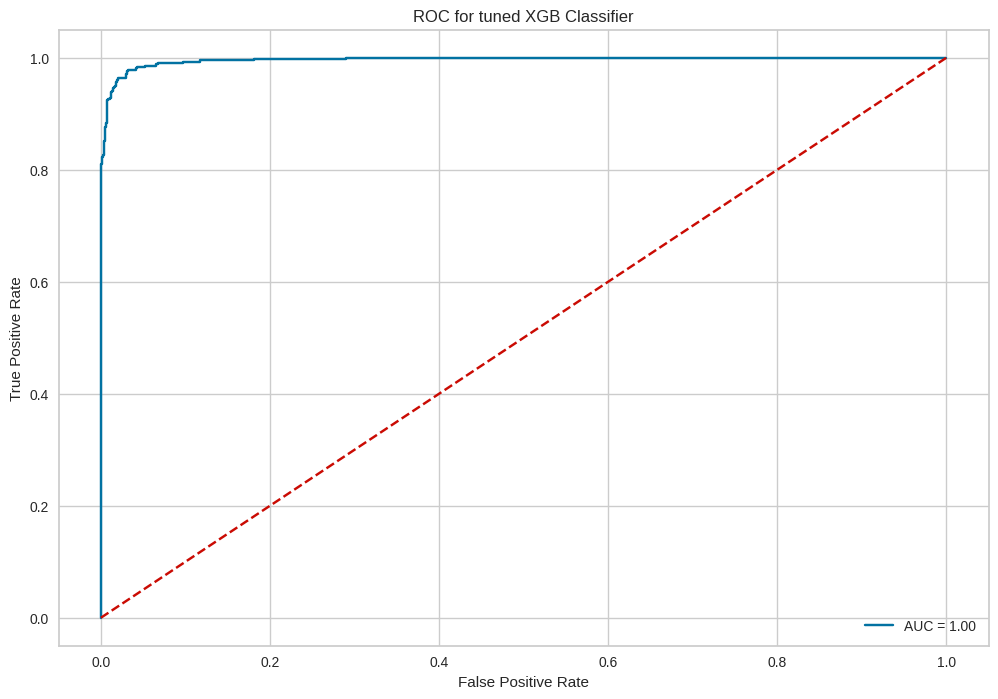

In [54]:
# Plotting AUC for untuned XGB Classifier
probs = xgb_c.predict_proba(sc_test)
pred = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12,8))
plt.title('ROC for tuned XGB Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

